In [9]:
import os,json,numpy
import matplotlib
import matplotlib as plt
figure_path='/home/chenboc1/localscratch2/chenboc1/Adver_Conv/result_figure/figures/'

Here I provide the trend of different orgnization method
- First I provide 15 files on the decimal training dataset
- with five different training dataset orgnization method
- with three different dataset as prompt
- We anaylise the distribution of the effective context to see what the hidden pattern inside the effective context

In [10]:
### Let us see how postive it was
## First chapter training text scre
# Here the path file should be the full path
path_dir='/home/chenboc1/localscratch2/chenboc1/Adver_Conv/result/eval/demo_job/'
file=[
# "1109_191254",
"1109_194132",
"1109_200504",
"1109_203249",
"1109_210032",
"1109_201247",
"1109_204134",
"1109_210919",
"1109_213706",
"1109_220504",
"1108_165135",
"1109_104440",
"1104_165451",
"1103_214037",
"1107_170343"
]
print(len(file))



14


- we extract two types of data from the log file
1.  we only care about the 'first' 'generated' toxic sentence and record its context --list
2. we also record all the dialogue that dont have a 'generated' toxic sentence involved --n_list
- we try to differeience between them

In [23]:


n_all_conv_context=[]
all_conv_context=[]
result_list_1,result_list_2,result_list_3,result_list_4=[],[],[],[]
for file_name in file:
    new_path_name=os.path.join(path_dir,file_name)
    # with open(os.path.join(new_path_name,'training_text_score.json'),'rb') as f:
    #     score=json.load(f)

    filename=os.path.join(new_path_name,'eval_dialogue.json')
    with open(filename, 'r') as f:
        data = json.load(f)

    conv_context=[]
    n_conv_context=[]
    num=0
    total=0
    for item in data:
        flag=False
        for i in item[1::2]:
            if i>0.5:
                flag=True
                # print(item)
                if item[item.index(i)-1]<0.5:
                    num+=1
                    conv_context.append(item[:item.index(i)-1])
                total+=1
                break
        if not flag:
            n_conv_context.append(item)
    all_conv_context.append(conv_context)
    n_all_conv_context.append(n_conv_context)


In [28]:
all_conv_context[0][0]

[0.008921904, 0.08320791]

- We try to get four types of results includes the following:
1. we collect all the toxic score between each source-target pair inside the conversation. Sum all for all pairs in a conversation and for all conversation in a log file ==> get 15 collections 
2. we collect average the toxic score for all the setnence in a dialogue for all the dialogues in a log
3. since we only care about whether it is small or big, we apply to use the sign function with the equation 1
4. we want to see the sequecen of pair, so we use sign function to calculate the distance between each pair in one dialogue for all the dialogue in a log

In [25]:
import json
result_list_1,result_list_2,result_list_3,result_list_4=[],[],[],[]
for conv_context in all_conv_context:
    score=conv_context
    result_list_1.append(sum([sum([conv[i*2+1]-conv[i*2] for i in range(int(len(conv)/2))]) for conv in score])/len(score))
    result_list_2.append(sum([sum(i) for i in score])/len(score)) # does not matter
    result_list_3.append(sum([sum(list(numpy.sign([conv[i*2+1]-conv[i*2] for i in range(int(len(conv)/2))]))) for conv in score])/len(score))
    result_list_4.append(sum([sum(list(numpy.sign([conv[(i+1)*2]+conv[(i+1)*2+1]-conv[i*2]-conv[i*2+1] for i in range(int(len(conv)/2)-1)]))) for conv in score])/len(score))
     
n_result_list_1,n_result_list_2,n_result_list_3,n_result_list_4=[],[],[],[]
for conv_context in n_all_conv_context:
    score=conv_context
    n_result_list_1.append(sum([sum([conv[i*2+1]-conv[i*2] for i in range(int(len(conv)/2))]) for conv in score])/len(score))
    n_result_list_2.append(sum([sum(i) for i in score])/len(score)) # does not matter
    n_result_list_3.append(sum([sum(list(numpy.sign([conv[i*2+1]-conv[i*2] for i in range(int(len(conv)/2))]))) for conv in score])/len(score))
    n_result_list_4.append(sum([sum(list(numpy.sign([conv[(i+1)*2]+conv[(i+1)*2+1]-conv[i*2]-conv[i*2+1] for i in range(int(len(conv)/2)-1)]))) for conv in score])/len(score))
 

First figure with four sub figures in one pic

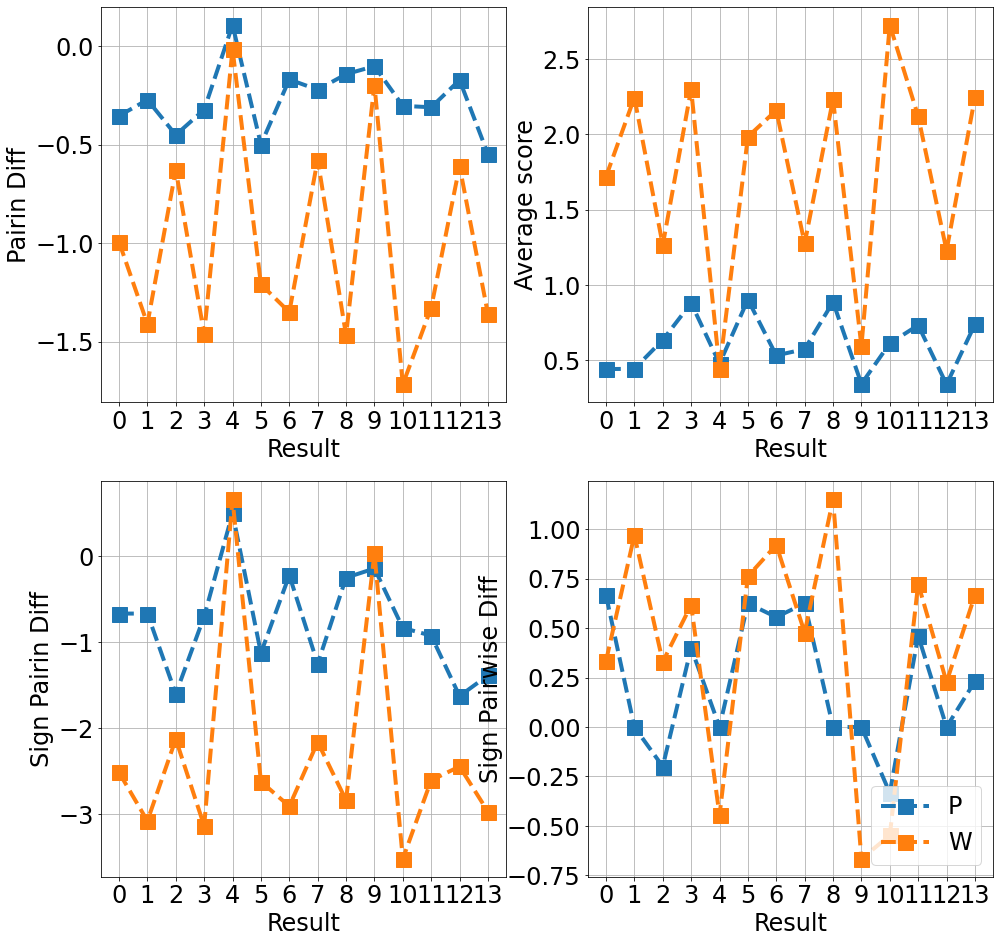

In [26]:
import matplotlib
import matplotlib.pyplot as plt
poison_rate=list(range(len(file)))
x = poison_rate
font = {'family': 'arial',
        'size': 24}
matplotlib.rcParams['mathtext.rm'] = 'arial'
matplotlib.rc('font', **font)
plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.xlabel('Result',fontdict=font)  # x轴标题
plt.ylabel('Pairin Diff',fontdict=font)  # y轴标题
plt.plot(x, result_list_1[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, n_result_list_1[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")

plt.subplot(2, 2, 2)
plt.xlabel('Result',fontdict=font)  # x轴标题
plt.ylabel('Average score',fontdict=font)  # y轴标题
plt.plot(x, result_list_2[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkblue',
)
plt.plot(x, n_result_list_2[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkblue',
)
# plt.plot(x, result_list[10:], 
#          linestyle = '--',
#          linewidth = 4,
#          marker = 's',
#          markersize = 15,
#         #  color = 'darkblue',
# )
plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")


plt.subplot(2, 2, 3)
plt.xlabel('Result',fontdict=font)  # x轴标题
plt.ylabel('Sign Pairin Diff',fontdict=font)  # y轴标题
plt.plot(x, result_list_3[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, n_result_list_3[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")

plt.subplot(2, 2, 4)
plt.xlabel('Result',fontdict=font)  # x轴标题
plt.ylabel('Sign Pairwise Diff',fontdict=font)  # y轴标题
plt.plot(x, result_list_4[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, n_result_list_4[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")

plt.legend(['P','W','Q'],fontsize=30,prop={'size':24},loc=4)
plt.savefig(os.path.join(figure_path,'initial_dialogue_anaylise.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
plt.show()

<Figure size 432x432 with 0 Axes>

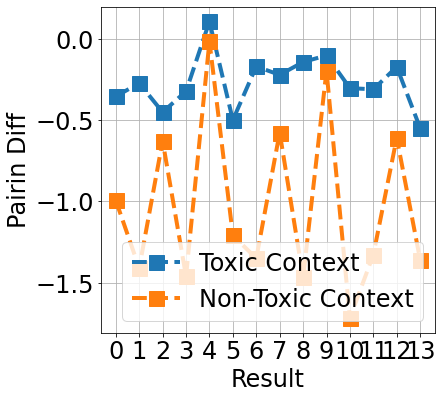

<Figure size 432x432 with 0 Axes>

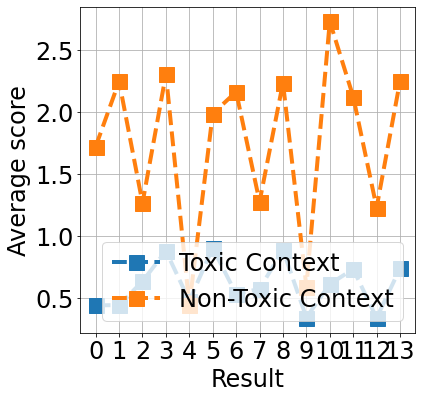

<Figure size 432x432 with 0 Axes>

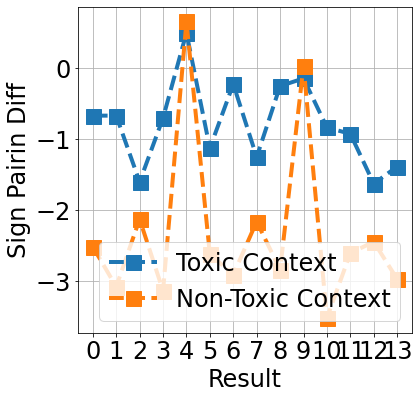

<Figure size 432x432 with 0 Axes>

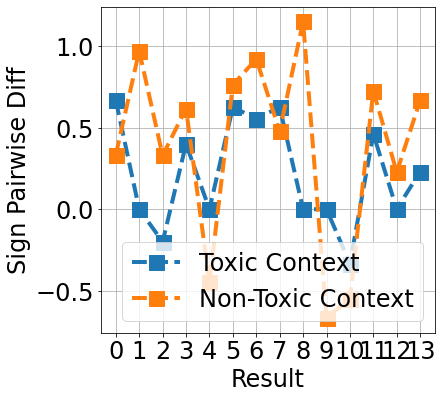

In [27]:

'''
================================
@1
================================
'''
#绘制折线图，添加数据点，设置点的大小
# * 表示绘制五角星；此处也可以不设置线条颜色，matplotlib会自动为线条添加不同的颜色
plt.figure(figsize=(6, 6))
plt.figure().set_size_inches(6,6)
plt.xlabel('Result',fontdict=font)  # x轴标题
plt.ylabel('Pairin Diff',fontdict=font)  # y轴标题
plt.plot(x, result_list_1[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, n_result_list_1[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
#给图像添加注释，并设置样式
# for a, b in zip(x, y1):
#     plt.text(a, b, b, ha='center', va='bottom')
# for a, b in zip(x, y2):
#     plt.text(a, b, b, ha='center', va='bottom')

plt.legend(['Toxic Context','Non-Toxic Context'],fontsize=30,prop={'size':24},loc=4)
#绘制图例
# plt.legend(['Single-Turn','Multi-Turn'],fontsize=30,prop={'size':24},loc=4)
# plt.savefig('Fig1_a.png', dpi=300,bbox_inches='tight',  pad_inches = 0)


plt.savefig(os.path.join(figure_path,'Fig1_a.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
plt.show()
#显示图像

'''
================================
@2
================================
'''

plt.figure(figsize=(6, 6))#figsize=(6, 6)

plt.figure().set_size_inches(6,6)
# plt.subplot(1, 2, 2)

plt.xlabel('Result',fontdict=font)  # x轴标题
plt.ylabel('Average score',fontdict=font)  # y轴标题
plt.plot(x, result_list_2[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkblue',
)
plt.plot(x, n_result_list_2[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkblue',
)
# plt.hlines(4.05, 0.01, 0.05, linewidth = 3,color = 'grey',linestyles ='--')

plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
plt.legend(['Toxic Context','Non-Toxic Context'],fontsize=30,prop={'size':24},loc=4)
     
# plt.legend(['Single-Turn','Multi-Turn','w/o Attack'],fontsize=30,prop={'size':24},loc=4)
#显示图像
# plt.ylim(3.8,4.2)
plt.savefig(os.path.join(figure_path,'Fig1_b.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
# plt.savefig('Fig1_b.png', dpi=300, bbox_inches='tight', pad_inches = 0)
plt.show()

'''
================================
@3
================================
'''

plt.figure(figsize=(6, 6))#figsize=(6, 6)

plt.figure().set_size_inches(6,6)
# plt.subplot(1, 2, 2)

plt.xlabel('Result',fontdict=font)  # x轴标题
plt.ylabel('Sign Pairin Diff',fontdict=font)  # y轴标题
plt.plot(x, result_list_3[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, n_result_list_3[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
# plt.hlines(4.05, 0.01, 0.05, linewidth = 3,color = 'grey',linestyles ='--')

plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
plt.legend(['Toxic Context','Non-Toxic Context'],fontsize=30,prop={'size':24},loc=4)
# plt.legend(['Single-Turn','Multi-Turn','w/o Attack'],fontsize=30,prop={'size':24},loc=4)
#显示图像
# plt.ylim(3.8,4.2)
plt.savefig(os.path.join(figure_path,'Fig1_c.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
# plt.savefig('Fig1_b.png', dpi=300, bbox_inches='tight', pad_inches = 0)
plt.show()


'''
================================
@4
================================
'''

plt.figure(figsize=(6, 6))#figsize=(6, 6)

plt.figure().set_size_inches(6,6)
# plt.subplot(1, 2, 2)

plt.xlabel('Result',fontdict=font)  # x轴标题
plt.ylabel('Sign Pairwise Diff',fontdict=font)  # y轴标题
plt.plot(x, result_list_4[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, n_result_list_4[:15], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
# plt.hlines(4.05, 0.01, 0.05, linewidth = 3,color = 'grey',linestyles ='--')

plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
plt.legend(['Toxic Context','Non-Toxic Context'],fontsize=30,prop={'size':24},loc=4)
#显示图像
# plt.ylim(3.8,4.2)
plt.savefig(os.path.join(figure_path,'Fig1_d.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
# plt.savefig('Fig1_b.png', dpi=300, bbox_inches='tight', pad_inches = 0)
plt.show()

=.= I just find this data result has some problems.
It should be positive, but it is not. Though the distance between the effective samples and uneffective samples is pretty clear.
1. Trained tool-model is ealsiy generate a toxic response in the middel part, that is the reason why the yellow line is not performing well
2. In the blue lines, we can see it is perfroming well when the chatbot is generating some toxic setncens.
In a conclusion, the performance is not stable for the tool-chatbot